In [12]:
import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def processing_data(data):
    data = (pd.DataFrame(data)
        .dropna()
        .assign(balance_profit = lambda _df: 100 * (_df.close_balance-_df.entry_balance) / _df.close_balance)
        .assign(profit = lambda _df: 100 * (_df.close_price-_df.entry_price) / _df.close_price)
    )
    return data

with open('results/base_dqn/deals_history.pkl', 'rb') as f:
    base_results = pickle.load(f)
    base_results = processing_data(base_results)

with open('results/double_dqn/deals_history.pkl', 'rb') as f:
    double_results = pickle.load(f)
    double_results = processing_data(double_results)

with open('results/dueling_dqn/deals_history.pkl', 'rb') as f:
    dueling_results = pickle.load(f)
    dueling_results = processing_data(dueling_results)

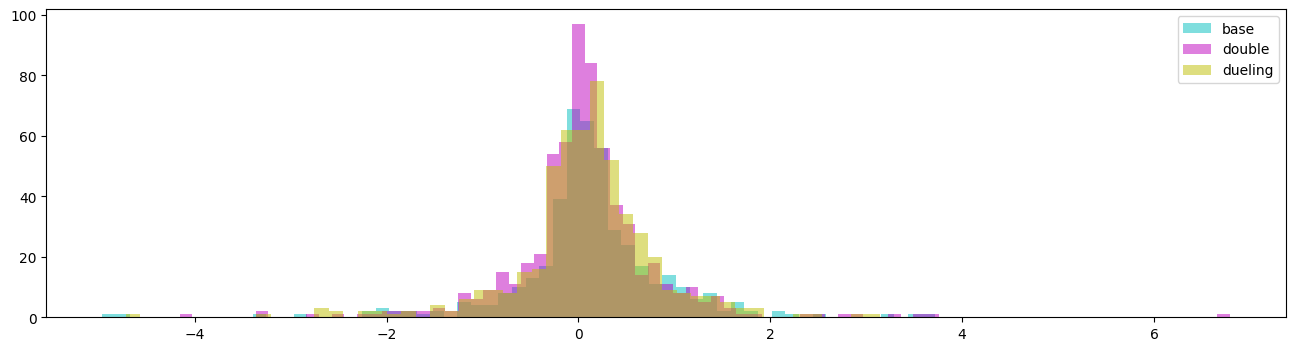

In [16]:
plt.figure(figsize=(16,4))
plt.hist(base_results.profit, bins='auto', color='c', label='base', alpha=0.5)
plt.hist(double_results.profit, bins='auto', color='m', label='double', alpha=0.5)
plt.hist(dueling_results.profit, bins='auto', color='y', label='dueling', alpha=0.5)
plt.legend()

In [17]:
print(f'Base avg profit: {base_results.profit.mean():.3f}')
print(f'Double avg profit: {double_results.profit.mean():.3f}')
print(f'Dueling avg profit: {dueling_results.profit.mean():.3f}')

Base avg profit: 0.115
Double avg profit: 0.063
Dueling avg profit: 0.084


In [37]:
print(f'Base avg balance profit: {base_results.balance_profit.mean():.3f}')
print(f'Double avg balance profit: {double_results.balance_profit.mean():.3f}')
print(f'Dueling avg balance profit: {dueling_results.balance_profit.mean():.3f}')

Base avg balance profit: 0.015
Double avg balance profit: -0.037
Dueling avg balance profit: -0.016


In [36]:
clip_value = 0.5
print(f'Clip [-{clip_value}, {clip_value}] Base avg profit: {base_results.profit.clip(-clip_value,clip_value).mean():.3f}')
print(f'Clip [-{clip_value}, {clip_value}] Double avg profit: {double_results.profit.clip(-clip_value,clip_value).mean():.3f}')
print(f'Clip [-{clip_value}, {clip_value}] Dueling avg profit: {dueling_results.profit.clip(-clip_value,clip_value).mean():.3f}')

Clip [-0.5, 0.5] Base avg profit: 0.081
Clip [-0.5, 0.5] Double avg profit: 0.039
Clip [-0.5, 0.5] Dueling avg profit: 0.076


In [18]:
print(f'Base std profit: {base_results.profit.std():.3f}')
print(f'Double std profit: {double_results.profit.std():.3f}')
print(f'Dueling std profit: {dueling_results.profit.std():.3f}')

Base std profit: 0.812
Double std profit: 0.775
Dueling std profit: 0.750


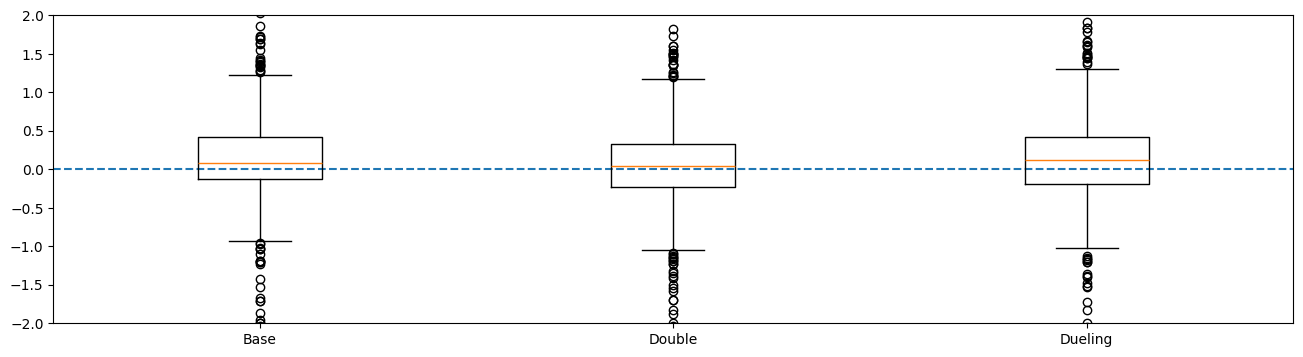

In [28]:
plt.figure(figsize=(16,4))
plt.axhline(0, linestyle='--')
plt.boxplot([base_results.profit, double_results.profit, dueling_results.profit], tick_labels=['Base', 'Double', 'Dueling'])
plt.ylim(-2,2)
# plt.legend()
print()

In [46]:
base_results[['profit', 'predict_q']].corr()

,profit,predict_q
profit,1.000000,-0.004128
predict_q,-0.004128,1.000000


In [48]:
double_results[['profit', 'predict_q', 'train_result_balance']].corr()

,profit,predict_q,train_result_balance
profit,1.000000,0.022865,-0.047613
predict_q,0.022865,1.000000,-0.084987
train_result_balance,-0.047613,-0.084987,1.000000


In [49]:
dueling_results[['profit', 'predict_q']].corr()

,profit,predict_q
profit,1.00000,0.04228
predict_q,0.04228,1.00000


In [54]:
print(f'Avg profit with q > 0: {dueling_results.query("predict_q > 0").profit.mean():.3f}')
print(f'Avg profit with q > 1: {dueling_results.query("predict_q > 1").profit.mean():.3f}')
print(f'Avg profit with q > 2: {dueling_results.query("predict_q > 2").profit.mean():.3f}')

Avg profit with q > 0: 0.084
Avg profit with q > 1: 0.080
Avg profit with q > 2: 0.085
